Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
import tensorflow  
from statsmodels.tsa.stattools import adfuller  
from sklearn.preprocessing import MinMaxScaler  
from tensorflow import keras  
from keras import callbacks  
from tensorflow.keras import Sequential  
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional  
from tensorflow.keras.optimizers import SGD  
import math  
from sklearn.metrics import mean_squared_error  
  
import warnings  
warnings.filterwarnings("ignore")

Importing Dataset

In [2]:
dataset = pd.read_csv("traffic_data.csv")
dataset.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


Data Exploration

In [3]:
dataset["DateTime"]= pd.to_datetime(dataset["DateTime"])  
dataset = dataset.drop(["ID"], axis=1) #dropping IDs column  
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


Text(0.5, 0, 'Date')

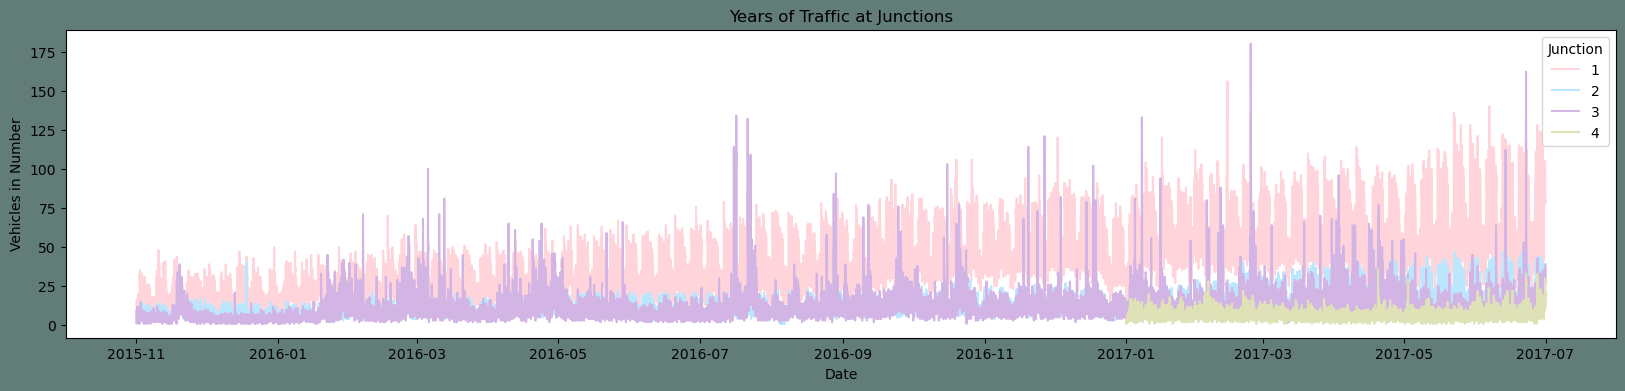

In [4]:
# dataframe to be used for EDA
dataframe = dataset.copy()

# Let's plot the timeseries
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20,4),facecolor="#627D78") 
Time_series=sns.lineplot(x=dataframe['DateTime'],y="Vehicles",data=dataframe, hue="Junction", palette=colors)
Time_series.set_title("Years of Traffic at Junctions")  
Time_series.set_ylabel("Vehicles in Number")  
Time_series.set_xlabel("Date") 

Feature Engineering

In [5]:
# Let's Explore more features

dataframe["Year"]= dataframe['DateTime'].dt.year  
dataframe["Month"]= dataframe['DateTime'].dt.month  
dataframe["Date_no"]= dataframe['DateTime'].dt.day  
dataframe["Hour"]= dataframe['DateTime'].dt.hour  
dataframe["Day"]= dataframe.DateTime.dt.strftime("%A")  
dataframe.head()  

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


Exploratory Data Analysis


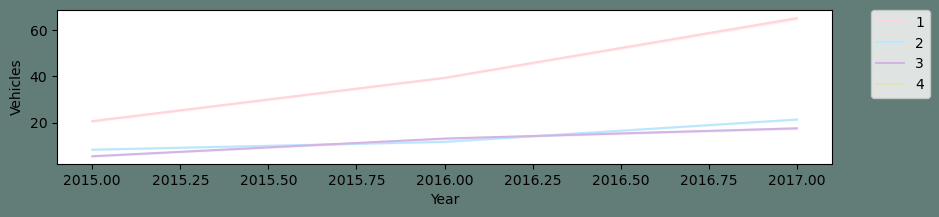

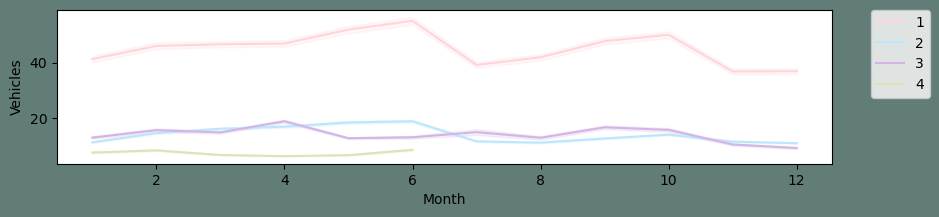

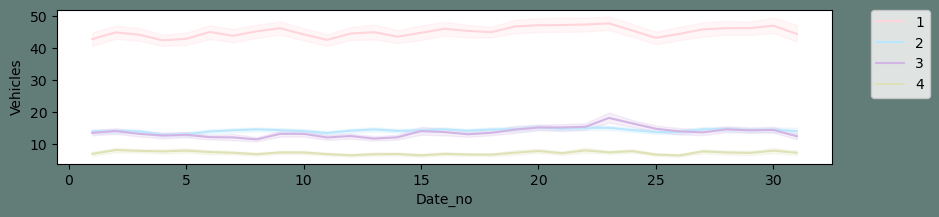

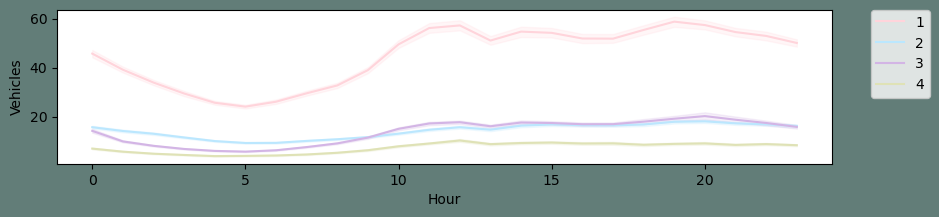

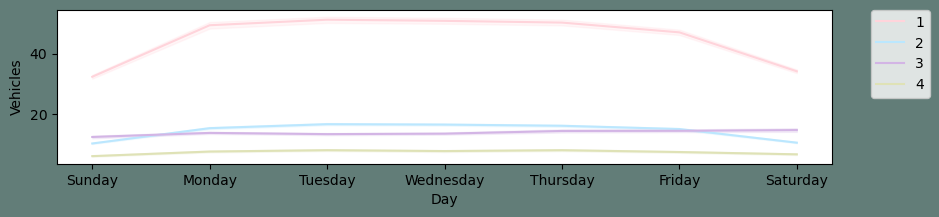

In [6]:
# Let's plot the Timeseries  
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]  
  
for i in new_features:  
    plt.figure(figsize=(10,2),facecolor="#627D78")  
    ax=sns.lineplot(x=dataframe[i],y="Vehicles",data=dataframe, hue="Junction", palette=colors )  
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  

Text(0.5, 0, 'Date')

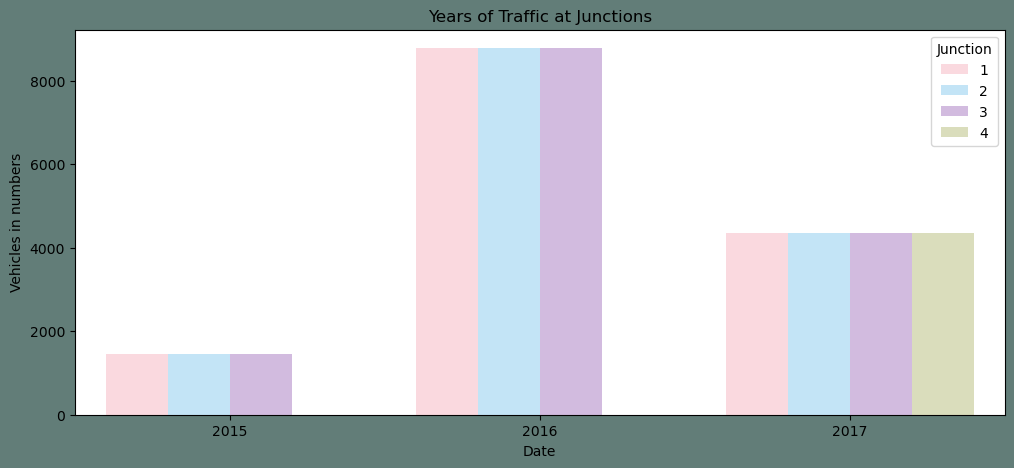

In [7]:
plt.figure(figsize=(12,5),facecolor="#627D78")  
count = sns.countplot(data=dataframe, x =dataframe["Year"], hue="Junction", palette=colors)  
count.set_title("Years of Traffic at Junctions")  
count.set_ylabel("Vehicles in numbers")  
count.set_xlabel("Date") 

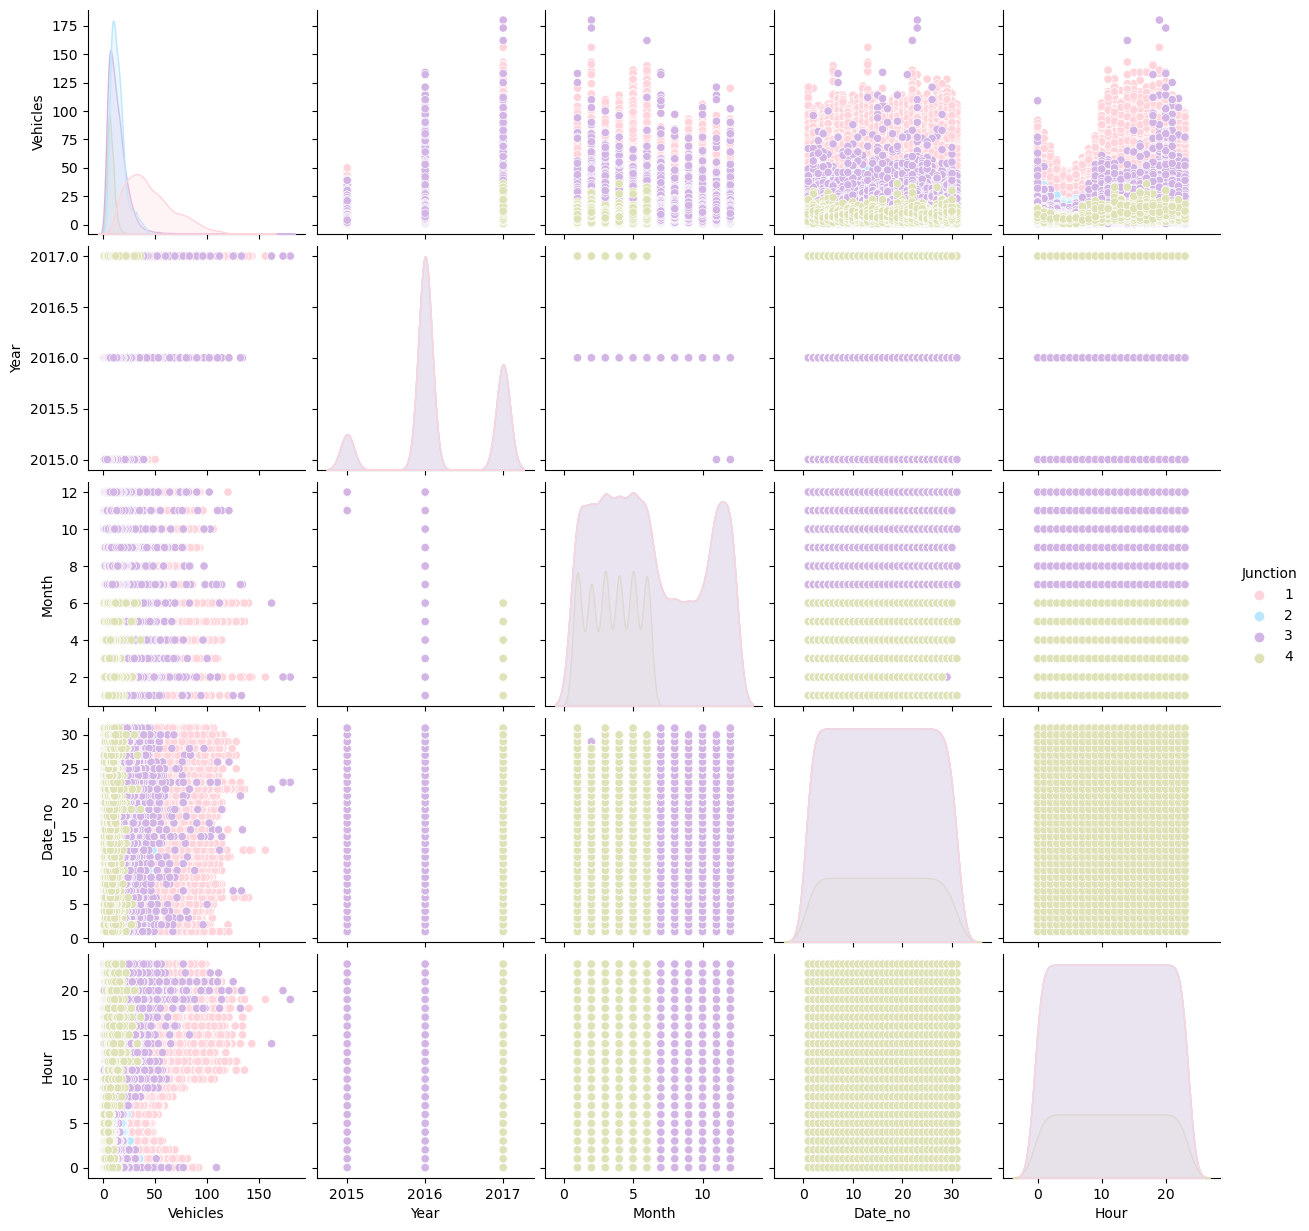

In [8]:
sns.pairplot(data=dataframe, hue= "Junction",palette=colors) 

Data Transformation and Preprocessing

In [9]:
# Pivoting dataset from junction  
dataframe_junction = dataset.pivot(columns="Junction", index="DateTime")  
dataframe_junction.describe() 

Vehicles                                         
Junction             1             2             3            4
count     14592.000000  14592.000000  14592.000000  4344.000000
mean         45.052906     14.253221     13.694010     7.251611
std          23.008345      7.401307     10.436005     3.521455
min           5.000000      1.000000      1.000000     1.000000
25%          27.000000      9.000000      7.000000     5.000000
50%          40.000000     13.000000     11.000000     7.000000
75%          59.000000     17.000000     18.000000     9.000000
max         156.000000     48.000000    180.000000    36.000000

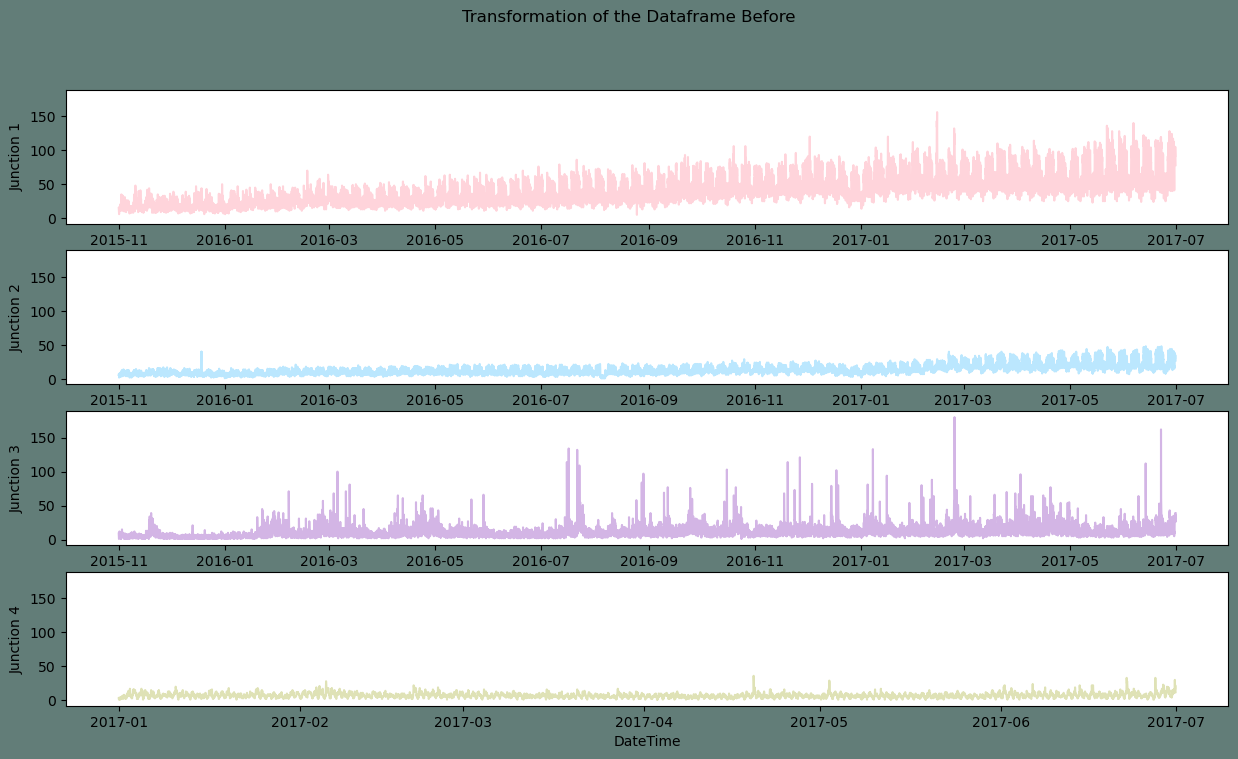

In [10]:
# Creating new dataframes  
dataframe_1 = dataframe_junction[[('Vehicles', 1)]]  
dataframe_2 = dataframe_junction[[('Vehicles', 2)]]  
dataframe_3 = dataframe_junction[[('Vehicles', 3)]]  
dataframe_4 = dataframe_junction[[('Vehicles', 4)]]  
dataframe_4 = dataframe_4.dropna() #For only a few months, Junction 4 has only had minimal data.  
  
# As DFS's data frame contains many indices, its index is lowering level one.  
list_dfs = [dataframe_1, dataframe_2, dataframe_3, dataframe_4]  
for i in list_dfs:  
    i.columns= i.columns.droplevel(level=1)    
  
# Creates comparison dataframe charts using this function  
def Sub_Plots4(dataframe_1, dataframe_2,dataframe_3,dataframe_4,title):  
    fig, axes = plt.subplots(4, 1, figsize=(15, 8),facecolor="#627D78", sharey=True)  
    fig.suptitle(title)  
    #J1  
    pl_1=sns.lineplot(ax=axes[0],data=dataframe_1,color=colors[0])  
    #pl_1=plt.ylabel()  
    axes[0].set(ylabel ="Junction 1")  
    #J2  
    pl_2=sns.lineplot(ax=axes[1],data=dataframe_2,color=colors[1])  
    axes[1].set(ylabel ="Junction 2")  
    #J3  
    pl_3=sns.lineplot(ax=axes[2],data=dataframe_3,color=colors[2])  
    axes[2].set(ylabel ="Junction 3")  
    #J4  
    pl_4=sns.lineplot(ax=axes[3],data=dataframe_4,color=colors[3])  
    axes[3].set(ylabel ="Junction 4")  
     
     
# It is displayed to test for stationarity.  
Sub_Plots4(dataframe_1.Vehicles, dataframe_2.Vehicles,dataframe_3.Vehicles,dataframe_4.Vehicles,"Transformation of the Dataframe Before") 

Steps for Transforming:

In [11]:
# Normalize Function  
def Normalize(dataframe,column):  
    average = dataframe[column].mean()  
    stdev = dataframe[column].std()  
    df_normalized = (dataframe[column] - average) / stdev  
    df_normalized = df_normalized.to_frame()  
    return df_normalized, average, stdev  
  
# Differencing Function  
def Difference(dataframe,column, interval):  
    diff = []  
    for i in range(interval, len(dataframe)):  
        value = dataframe[column][i] - dataframe[column][i - interval]  
        diff.append(value)  
    return diff  

In [12]:
# In order to make the series stationary, normalize and differ  
dataframe_N1, avg_J1, std_J1 = Normalize(dataframe_1, "Vehicles")  
Diff_1 = Difference(dataframe_N1, column="Vehicles", interval=(24*7)) #taking a week's difference  
dataframe_N1 = dataframe_N1[24*7:]  
dataframe_N1.columns = ["Norm"]  
dataframe_N1["Diff"]= Diff_1  
  
dataframe_N2, avg_J2, std_J2 = Normalize(dataframe_2, "Vehicles")  
Diff_2 = Difference(dataframe_N2, column="Vehicles", interval=(24)) #taking a day's difference  
dataframe_N2 = dataframe_N2[24:]  
dataframe_N2.columns = ["Norm"]  
dataframe_N2["Diff"]= Diff_2  
  
dataframe_N3, avg_J3, std_J3 = Normalize(dataframe_3, "Vehicles")  
Diff_3 = Difference(dataframe_N3, column="Vehicles", interval=1) #taking an hour's difference  
dataframe_N3 = dataframe_N3[1:]  
dataframe_N3.columns = ["Norm"]  
dataframe_N3["Diff"]= Diff_3  
  
dataframe_N4, avg_J4, std_J4 = Normalize(dataframe_4, "Vehicles")  
Diff_4 = Difference(dataframe_N4, column="Vehicles", interval=1) #taking an hour's difference  
dataframe_N4 = dataframe_N4[1:]  
dataframe_N4.columns = ["Norm"]  
dataframe_N4["Diff"]= Diff_4  

Plots of Transformed Dataframe

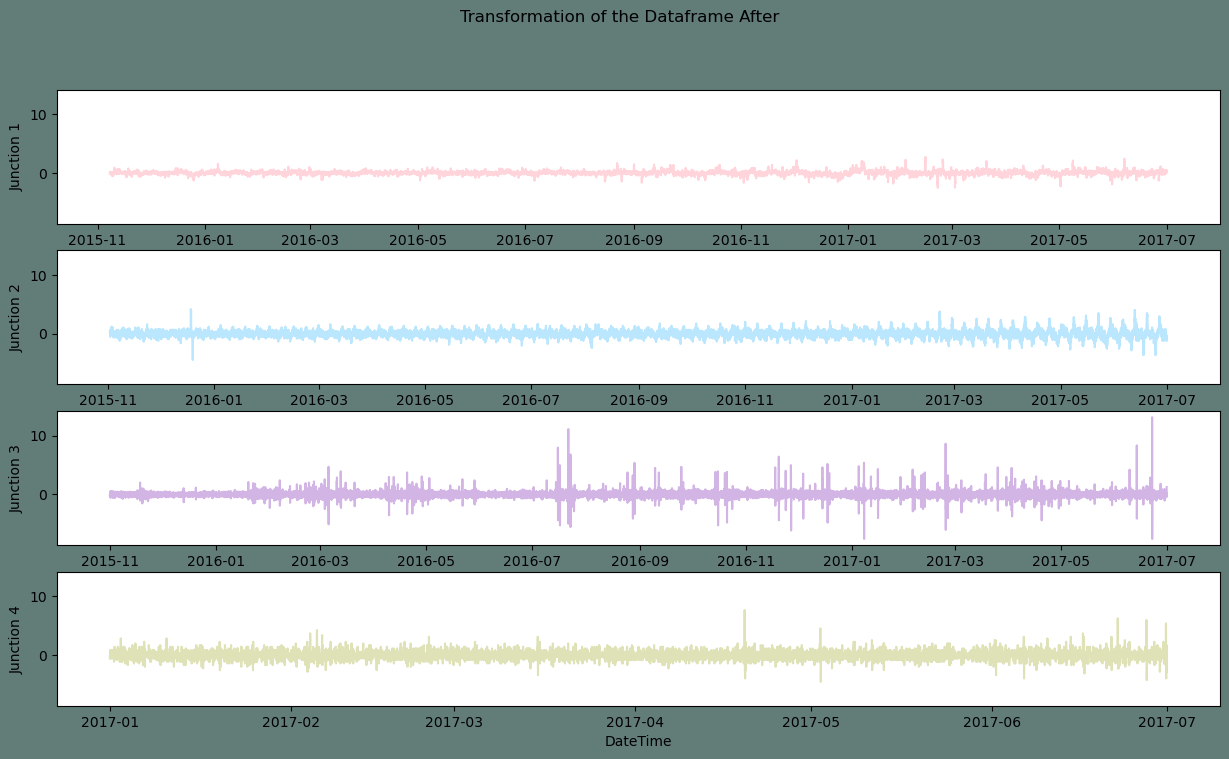

In [13]:
Sub_Plots4(dataframe_N1.Diff, dataframe_N2.Diff,dataframe_N3.Diff,dataframe_N4.Diff,"Transformation of the Dataframe After") 

In [14]:
# Stationary time series check Improved Dickey-Fuller test  
def Stationary_check(dataframe):  
    check = adfuller(dataframe.dropna())  
    print(f"ADF Statistic: {check[0]}")  
    print(f"p-value: {check[1]}")  
    print("Critical Values:")  
    for key, value in check[4].items():  
        print('\t%s: %.3f' % (key, value))  
    if check[0] > check[4]["1%"]:  
        print("Time Series is Non-Stationary")  
    else:  
        print("Time Series is Stationary")  
   
  
# examining the series' stationary state  
  
List_df_ND = [ dataframe_N1["Diff"], dataframe_N2["Diff"], dataframe_N3["Diff"], dataframe_N4["Diff"]]  
print("Checking the transformed series for stationarity:")  
for i in List_df_ND:  
    print("\n")  
    Stationary_check(i)  

Checking the transformed series for stationarity:


ADF Statistic: -15.265303390415554
p-value: 4.798539876395033e-28
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -21.79589102694002
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -28.001759908832707
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -17.97909256305282
p-value: 2.7787875325943866e-30
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Time Series is Stationary


Preparing the data for the neural network :

In [15]:
# Several NA values were produced as a result of differencing using a week's worth of data.  
dataframe_J1 = dataframe_N1["Diff"].dropna()  
dataframe_J1 = dataframe_J1.to_frame()  
  
dataframe_J2 = dataframe_N2["Diff"].dropna()  
dataframe_J2 = dataframe_J2.to_frame()  
  
dataframe_J3 = dataframe_N3["Diff"].dropna()  
dataframe_J3 = dataframe_J3.to_frame()  
  
dataframe_J4 = dataframe_N4["Diff"].dropna()  
dataframe_J4 = dataframe_J4.to_frame()  
  
# Splitting the dataset  
def Split_data(dataframe):  
    training_size = int(len(dataframe)*0.90)  
    data_len = len(dataframe)  
    train, test = dataframe[0:training_size],dataframe[training_size:data_len]  
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)  
    return train, test  
# Splitting the training and test datasets  
Junction1_train, Junction1_test = Split_data(dataframe_J1)  
Junction2_train, Junction2_test = Split_data(dataframe_J2)  
Junction3_train, Junction3_test = Split_data(dataframe_J3)  
Junction4_train, Junction4_test = Split_data(dataframe_J4)  
  
# Target and Feature  
def target_and_feature(dataframe):  
    end_len = len(dataframe)  
    X = []  
    y = []  
    steps = 32  
    for i in range(steps, end_len):  
        X.append(dataframe[i - steps:i, 0])  
        y.append(dataframe[i, 0])  
    X, y = np.array(X), np.array(y)  
    return X ,y  
  
# fixing the shape of X_test and X_train  
def FeatureFixShape(train, test):  
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))  
    test = np.reshape(test, (test.shape[0],test.shape[1],1))  
    return train, test  
  
# Assigning features and target  
X_train_Junction1, y_train_Junction1 = target_and_feature(Junction1_train)  
X_test_Junction1, y_test_Junction1 = target_and_feature(Junction1_test)  
X_train_Junction1, X_test_Junction1 = FeatureFixShape(X_train_Junction1, X_test_Junction1)  
  
X_train_Junction2, y_train_Junction2 = target_and_feature(Junction2_train)  
X_test_Junction2, y_test_Junction2 = target_and_feature(Junction2_test)  
X_train_Junction2, X_test_Junction2 = FeatureFixShape(X_train_Junction2, X_test_Junction2)  
  
X_train_Junction3, y_train_Junction3 = target_and_feature(Junction3_train)  
X_test_Junction3, y_test_Junction3 = target_and_feature(Junction3_test)  
X_train_Junction3, X_test_Junction3 = FeatureFixShape(X_train_Junction3, X_test_Junction3)  
  
X_train_Junction4, y_train_Junction4 = target_and_feature(Junction4_train)  
x_test_Junction4, y_test_Junction4 = target_and_feature(Junction4_test)  
X_train_Junction4, x_test_Junction4 = FeatureFixShape(X_train_Junction4, x_test_Junction4)  

Model Building

In [24]:
#Model for the prediction  
def GRU_model(X_Train, y_Train, X_Test):  
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True)  
     
    #The GRU model  
    model = Sequential()  
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
     
    model.add(GRU(units=50, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
    model.add(Dense(units=1))  
     
    # Compiling the model  
    model.compile(optimizer=SGD(learning_rate=1e-7, momentum=0.9), loss='mean_squared_error')
    model.fit(X_Train, y_Train, epochs=50, batch_size=150, callbacks=[early_stopping], validation_data=(X, y))

    pred_GRU= model.predict(X_Test)  
    return pred_GRU  
  
# To determine the root mean squared prediction error  
def RMSE_Value(test,predicted):  
    rmse = math.sqrt(mean_squared_error(test, predicted))  
    print("The root mean squared error is {}.".format(rmse))  
    return rmse  
  
# Plotting the goal and forecast comparison plot  
def PredictionsPlot(test,predicted,m):  
    plt.figure(figsize=(12,5),facecolor="#627D78")  
    plt.plot(test, color=colors[m],label="True Value",alpha=0.5 )  
    plt.plot(predicted, color="#627D78",label="Predicted Values")  
    plt.title("GRU Traffic Prediction Vs True values")  
    plt.xlabel("DateTime")  
    plt.ylabel("Number of Vehicles")  
    plt.legend()  
    plt.show()  

Fitting the Model

Plotting the predictions and test set while fitting the first junction

In [25]:
#Predictions For First Junction  
PredJ1 = GRU_model(X_train_Junction1,y_train_Junction1,X_test_Junction1) 

NameError: name 'X' is not defined

In [ ]:
#Results for J1  
RMSE_J1=RMSE_Value(y_test_Junction1,PredJ1)  
PredictionsPlot(y_test_Junction1,PredJ1,0) 

Plotting the predictions and test set while fitting the second junction

In [ ]:
#Predictions For Second Junction  
PredJ2 = GRU_model(X_train_Junction2,y_test_Junction1,X_test_Junction2)

In [ ]:
#Results for J2  
RMSE_J2=RMSE_Value(y_test_Junction2,PredJ2)  
PredictionsPlot(y_test_Junction2,PredJ2,1) 

Plotting the predictions and test set while fitting the third junction

In [ ]:
#Predictions For Third Junction  
PredJ3 = GRU_model(X_train_Junction3,y_train_Junction3,X_test_Junction3)

In [ ]:
#Results for J3  
RMSE_J3=RMSE_Value(y_test_Junction3,PredJ3)  
PredictionsPlot(y_test_Junction3,PredJ3,2)  

Plotting the predictions and test set while fitting the fourth junction

In [ ]:
#Predictions For Forth Junction  
PredJ4 = GRU_model(X_train_Junction4,y_train_Junction4,x_test_Junction4)

In [ ]:
#Results for J4  
RMSE_J4=RMSE_Value(y_test_Junction4,PredJ4)  
PredictionsPlot(y_test_Junction4,PredJ4,3)

Results of the model

In [ ]:
# Set the data in lists to the initial error values of the four junctions.  
Junctions = ["Junction1", "Junction2", "Junction3", "Junction4"]  
RMSE = [RMSE_J1, RMSE_J2, RMSE_J3, RMSE_J4]  
list_of_tuples = list(zip(Junctions, RMSE))  
# Creates pandas DataFrame.  
Results = pd.DataFrame(list_of_tuples, columns=["Junction", "RMSE"])  
Results.style.background_gradient(cmap="Pastel1")

Inversing the Transformation of the Data

In [ ]:
# Functions to inverse transforms and plot comparative plots  
# invert differenced forecast  
def inverse_difference(last_ob, value):  
    inversed = value + last_ob  
    return inversed  
  
#Plotting the comparison  
def Sub_Plots2(df_1, df_2,title,m):  
    fig, axes = plt.subplots(1, 2, figsize=(18,4), sharey=True,facecolor="#627D78")  
    fig.suptitle(title)  
     
    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[m])  
    axes[0].set(ylabel ="Prediction")  
     
    pl_2=sns.lineplot(ax=axes[1],data=df_2["Vehicles"],color="#627D78")  
    axes[1].set(ylabel ="Orignal")  

The first junction's inverse transform

In [ ]:
# invert the differenced forecast for Junction 1  
recover1 = dataframe_N1.Norm[-1412:-1].to_frame()  
recover1["Pred"]= PredJ1  
Transform_reverssed_J1 = inverse_difference(recover1.Norm, recover1.Pred).to_frame()  
Transform_reverssed_J1.columns = ["Pred_Normed"]  
#Invert the normalization J1  
Final_J1_Pred = (Transform_reverssed_J1.values* std_J1) + avg_J1  
Transform_reverssed_J1["Pred_Final"] =Final_J1_Pred  
#Plotting the Predictions with originals  
Sub_Plots2(Transform_reverssed_J1["Pred_Final"], dataframe_1[-1412:-1],"Pridictions And Orignals For Junction 1", 0)  

The second junction's inverse transformation

In [ ]:
#Invert the differenced J2  
recover2 = dataframe_N2.Norm[-1426:-1].to_frame() #len as per the diff  
recover2["Pred"]= PredJ2  
Transform_reverssed_J2 = inverse_difference(recover2.Norm, recover2.Pred).to_frame()  
Transform_reverssed_J2.columns = ["Pred_Normed"]  
Final_J2_Pred = (Transform_reverssed_J2.values* std_J2) + avg_J2  
Transform_reverssed_J2["Pred_Final"] =Final_J2_Pred  
#Plotting the Predictions with originals  
Sub_Plots2(Transform_reverssed_J2["Pred_Final"], dataframe_2[-1426:-1],"Pridictions And Orignals For Junction 2", 1)  

The third junction's inverse transform

In [ ]:
#Invert the differenced J3  
recover3 = dataframe_N3.Norm[-1429:-1].to_frame() #len as per the diff  
recover3["Pred"]= PredJ3  
Transform_reverssed_J3 = inverse_difference(recover3.Norm, recover3.Pred).to_frame()  
Transform_reverssed_J3.columns = ["Pred_Normed"]  
#Invert the normalization J3  
Final_J3_Pred = (Transform_reverssed_J3.values* std_J3) + avg_J3  
Transform_reverssed_J3["Pred_Final"] =Final_J3_Pred  
Sub_Plots2(Transform_reverssed_J3["Pred_Final"], dataframe_3[-1429:-1],"Pridictions And Orignals For Junction 3", 2)  

The fourth junction's inverse transformation

In [ ]:
#Invert the differenced J4  
recover4 = dataframe_N4.Norm[-404:-1].to_frame()  #len as per the test set  
recover4["Pred"]= PredJ4  
Transform_reverssed_J4 = inverse_difference(recover4.Norm, recover4.Pred).to_frame()  
Transform_reverssed_J4.columns = ["Pred_Normed"]  
#Invert the normalization J4  
Final_J4_Pred = (Transform_reverssed_J4.values* std_J4) + avg_J4  
Transform_reverssed_J4["Pred_Final"] =Final_J4_Pred  
Sub_Plots2(Transform_reverssed_J4["Pred_Final"], dataframe_4[-404:-1],"Pridictions And Orignals For Junction 4", 3) 